 Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.


In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Not Used
import math


In [114]:
df = pd.read_csv("./exam_data.csv")

In [115]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [116]:
print("The dimensions of the dataframe is as follows : ",df.shape)

The dimensions of the dataframe is as follows :  (1000, 8)


In [117]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [118]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [119]:
df.dtypes
# checking the types of all fields in the dataframe.....

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [120]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [121]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

#### Converting dtype of math score from object to float64.  Replacing all missing values with avg

In [122]:
df['math score'] = df['math score'].replace('?',np.nan)
df['math score'] = df['math score'].astype('float64')
avg_math_score  = df['math score'].sum()/df['math score'].count()   #  or we can use df['math score'].mean()
df['math score'].replace(np.nan,avg_math_score,inplace = True)
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  9
dtype: int64

In [123]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [124]:
df.dropna(subset=['reading score','writing score'],axis = 0,inplace = True)

In [125]:
df.shape

(985, 8)

In [126]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [127]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
math_outliers = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]
print("The Q1 : ",Q1)
print("The Q3 :",Q3)
print("The shape of the math outliers are ",math_outliers.shape)
math_outliers

The Q1 :  57.0
The Q3 : 76.0
The shape of the math outliers are  (14, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
91,male,group C,high school,free/reduced,none,27.0,34.0,36.0
145,female,group C,some college,free/reduced,none,22.0,39.0,33.0
327,male,group A,some college,free/reduced,none,28.0,23.0,19.0
338,female,group B,some high school,free/reduced,none,24.0,38.0,27.0
363,female,group D,some high school,free/reduced,none,27.0,34.0,32.0
420,female,group C,associate's degree,free/reduced,completed,113.0,93.0,93.0
431,female,group C,high school,standard,none,123.0,72.0,70.0
456,female,group D,bachelor's degree,standard,none,-89.0,89.0,89.0
466,female,group D,associate's degree,free/reduced,none,26.0,31.0,38.0


<Axes: ylabel='math score'>

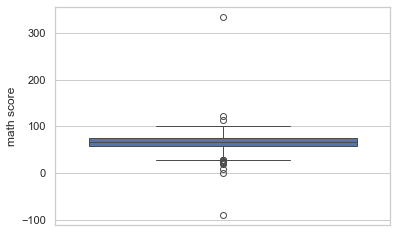

In [128]:
sns.boxplot(data = df['math score'])

In [129]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
reading_outliers = df[(df['reading score'] < lower_bound) | (df['reading score'] > upper_bound)]
reading_outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
18,male,group C,master's degree,free/reduced,completed,66.323929,22.0,46.0
19,female,group C,associate's degree,free/reduced,none,66.323929,22.0,61.0
20,male,group D,high school,standard,none,66.323929,12.0,63.0
21,female,group B,some college,free/reduced,completed,66.323929,12.0,70.0
22,male,group D,some college,standard,none,66.323929,13.0,53.0
24,male,group D,bachelor's degree,free/reduced,completed,74.000000,9.0,80.0
25,male,group A,master's degree,free/reduced,none,73.000000,8.0,72.0
26,male,group B,some college,standard,none,69.000000,7.0,55.0
27,female,group C,bachelor's degree,standard,none,67.000000,6.0,75.0
29,female,group D,master's degree,standard,none,62.000000,3.0,75.0


In [130]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['writing score'] < lower_bound) | (df['writing score'] > upper_bound)]
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
76,male,group E,some high school,standard,none,30.0,26.0,22.0
327,male,group A,some college,free/reduced,none,28.0,23.0,19.0
465,female,group C,some college,standard,none,84.0,87.0,114.0
542,female,group C,associate's degree,standard,none,81.0,77.0,455.0
591,male,group A,some high school,standard,none,71.0,62.0,567.0
596,male,group B,high school,free/reduced,none,30.0,24.0,15.0
651,female,group A,high school,standard,completed,68.0,80.0,554.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0


<Axes: ylabel='writing score'>

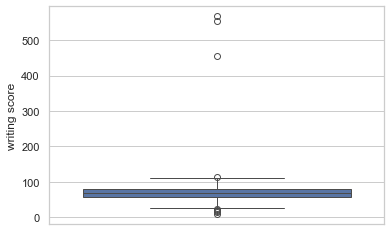

In [131]:
sns.boxplot(data = df['writing score'])

## NOW we will be applying Transformation

In [132]:
# MIN-MAX Normalization
df['math score'] = (df['math score'] - df['math score'].min())/(df['math score'].max() - df['math score'].min())

In [133]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.380615,72.0,74.0
1,female,group C,some college,standard,completed,0.373522,90.0,88.0
2,female,group B,master's degree,standard,none,0.423168,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,0.321513,57.0,44.0
4,male,group C,some college,standard,none,0.390071,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.418440,99.0,95.0
996,male,group C,high school,free/reduced,none,0.356974,55.0,55.0
997,female,group C,high school,free/reduced,completed,0.349882,71.0,65.0
998,female,group D,some college,standard,completed,0.371158,78.0,77.0


In [134]:
# Decimal Normalization 
max_reading = df['reading score'].astype('float64').max()
mul = 1.0
maxi = max_reading
while maxi>1:
    mul *= 10
    maxi = max_reading/mul
df['reading score'] = df['reading score']/mul
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.380615,0.72,74.0
1,female,group C,some college,standard,completed,0.373522,0.90,88.0
2,female,group B,master's degree,standard,none,0.423168,0.95,93.0
3,male,group A,associate's degree,free/reduced,none,0.321513,0.57,44.0
4,male,group C,some college,standard,none,0.390071,0.78,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.418440,0.99,95.0
996,male,group C,high school,free/reduced,none,0.356974,0.55,55.0
997,female,group C,high school,free/reduced,completed,0.349882,0.71,65.0
998,female,group D,some college,standard,completed,0.371158,0.78,77.0


C:\Users\hp\AppData\Local\Temp\ipykernel_18836\1604853522.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['writing score'])    # /// Yeh dekhne k liye ki kahin joh yeh variable hain normally distributed hain ya nahi


<Axes: xlabel='writing score', ylabel='Density'>

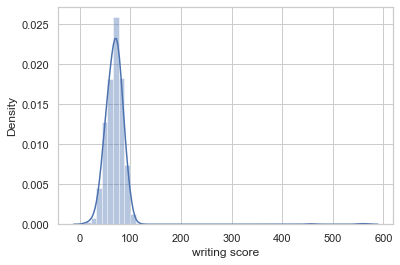

In [142]:
# Z-index normalization
sns.distplot(df['writing score'])   # Yeh dekhne k liye ki kahin joh yeh variable hain normally distributed hain ya nahi
                                    # agar hain so we can use z-score normalization..........

In [165]:
avg = df['writing score'].mean()
square_mean = [(i-avg)**2 for i in df['writing score']]
square_mean_sum = sum(square_mean)
varience = square_mean_sum / df['writing score'].count()
std_deviation = math.sqrt(varience)
print("Standard Deviation of writing score : ",std_deviation)

# In shortcut we could instead just use ==> df['writing score'].std() 

Standard Deviation of writing score :  29.6212794515397


In [167]:
df['writing score'] = ((df['writing score'] - avg)/std_deviation)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.380615,0.72,0.153889
1,female,group C,some college,standard,completed,0.373522,0.90,0.626522
2,female,group B,master's degree,standard,none,0.423168,0.95,0.795319
3,male,group A,associate's degree,free/reduced,none,0.321513,0.57,-0.858897
4,male,group C,some college,standard,none,0.390071,0.78,0.187648
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.418440,0.99,0.862838
996,male,group C,high school,free/reduced,none,0.356974,0.55,-0.487542
997,female,group C,high school,free/reduced,completed,0.349882,0.71,-0.149947
998,female,group D,some college,standard,completed,0.371158,0.78,0.255167
